In [1]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt
import ballbeammodel as bb
import CostFunc as CF

In [ ]:
bounds = [(0,1000),(0,1000),(0,1000)]
args = [0.014,0.15]
result = differential_evolution(CF.costfunc,
                                bounds,
                                args,
                                strategy='best1bin',
                                maxiter = 20000,
                                popsize = 30,
                                mutation = 0.9,
                                recombination = 0.3,
                                polish = True,
                                init = 'latinhypercube',
                                disp = True)

# result = differential_evolution(CF.costfunc,         - Sets the cost function
#                                 bounds,              - Sets limits for values
#                                 args,                - dt and setpoint for calculations
#                                 strategy='best1bin', - mutation strategy
#                                 maxiter = 20000,     - max iterations
#                                 popsize = 30,        - population size
#                                 mutation = 0.9,      - mutation rate
#                                 recombination = 0.3, - crossover rate
#                                 polish = True,       - polishes final answer to achieve lower cost
#                                 init = 'sobol')      - randomly initialises first population

In [40]:
result #rand1bin

 message: Optimization terminated successfully.
 success: True
     fun: 0.049824080891305966
       x: [ 2.417e+02  9.027e+01  6.793e+02]
     nit: 53
    nfev: 4880
     jac: [-9.860e-07  1.506e-07 -1.041e-08]

In [33]:
result.x,result.fun

(array([242.99407372,  89.17664077, 373.42384357]), 0.049835189467517256)

In [30]:
result.x,result.fun 

(array([289.29591754, 107.80018605, 274.82095318]), 0.049784141852968394)

In [42]:
result #best1bin

 message: Optimization terminated successfully.
 success: True
     fun: 0.04989201469435644
       x: [ 1.655e+02  6.105e+01  9.306e+02]
     nit: 33
    nfev: 3088
     jac: [-7.717e-06  2.386e-05 -1.138e-07]

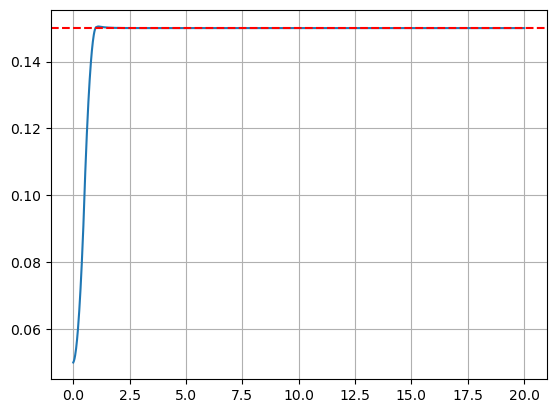

In [6]:
Kp = result.x[0]
Kd = result.x[1]
Ki = result.x[2]
T,X,U,V = bb.ballbeammodel(Kp,Kd,Ki,0.014,0.15)
plt.plot(T,X)
plt.axhline(0.15,linestyle = '--',color = 'r')
plt.grid(True,which='both')

In [13]:
import numpy as np
import scipy as sp
#parameters
tf = 10      #time period of simulation
limit = 35   #limit of angle of beam in degrees
L = 0.3    #beam length
m = 0.023    #ball mass
R = 0.02    #ball radius
g = -9.8      #gravitational acceleration
d = 0.03     #lever arm offset
J = (2/3)*m*R**2    #Moment of inertia of a hollow sphere
#J = (2/5)*m*R**2   #Moment of inertia of a solid sphere

def ballbeammodeldisp(Kp,Kd,Ki,dt,SP):
    dt = dt
    t = 0
    x = 0.05
    SP = SP
    v = 0
    u = 0
    Ierror = 0
    uprev = 0
    
    Ulis = []
    Ulis.append(u)
    Xlis = []
    Xlis.append(x)
    Tlis = []
    Tlis.append(t)
    Vlis = []
    Vlis.append(v)
    
    while (t<tf):
#         if t==15.497999999999688:
#             x = 0.20
        u = max((-limit*(np.pi/180)),min((limit*(np.pi/180)),Kp*(x-SP)+Kd*v+Ki*((x-SP)*(dt))))*(d/L)
        

        udot = (u-uprev)/dt
        t += dt
        v += ((m*g*np.sin(u)+(m*x*udot**2))/(((J/R**2)+m)))*(dt)
        x += v*(dt)
        x = max(0,min(L,x))
        uprev = u
        
        
        Ulis.append(u)
        Tlis.append(t)
        Vlis.append(v)
        Xlis.append(x)
        
        
    return Tlis,Xlis,Ulis,Vlis